## Read csv file

In [78]:
import pandas as pd
df = pd.read_csv('../data/taxi_trip_pricing.csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


: 

: 

## Initial Data Inspection (Raw Statistics)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,950.0,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,950.0,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,950.0,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,950.0,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,950.0,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,950.0,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,951.0,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


: 

: 

In [ ]:
df.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

: 

: 

In [ ]:
df[df.isna().any(axis=1)]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216
...,...,...,...,...,...,...,...,...,...,...,...
991,35.04,Morning,Weekend,4.0,Medium,Rain,2.90,1.10,0.15,9.99,NaN
993,NaN,Morning,Weekday,3.0,Medium,Clear,2.65,1.35,NaN,25.61,55.3348
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236


: 

: 

### Drop the `Passenger_Count` column because it does not significantly affect the target


In [ ]:
df = df.drop('Passenger_Count', axis=1)
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,High,Clear,2.93,0.63,0.32,22.64,15.6180


: 

: 

### Final Feature Selection: Removing Redundant Formula Columns

Base_Fare, Per_Km_Rate, and Per_Minute_Rate are removed because they are
internal pricing components derived from the pricing formula. Including
them would allow the model to implicitly reconstruct the target value
rather than learning patterns from contextual features such as distance,
time, traffic, and weather.

Removing these columns ensures a fair and realistic machine learning setup
and prevents the model from relying on internal pricing mechanics.


In [ ]:
df = df.drop(['Base_Fare','Per_Km_Rate','Per_Minute_Rate'], axis=1)
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,Low,Clear,53.82,36.2624
1,47.59,Afternoon,Weekday,High,Clear,40.57,NaN
2,36.87,Evening,Weekend,High,Clear,37.27,52.9032
3,30.33,Evening,Weekday,Low,NaN,116.81,36.4698
4,NaN,Evening,Weekday,High,Clear,22.64,15.6180


: 

: 

### Split dataset by target availability

- `df_known`: rows with `Trip_Price` available → used for training  
- `df_unknown`: rows with `Trip_Price` missing → used for prediction
- `.copy()` is used to **avoid modifying the original DataFrame** when we fill missing values later

In [ ]:
df_known = df[df["Trip_Price"].notna()].copy()
df_unknown = df[df["Trip_Price"].isna()].copy()

: 

: 

### Handling Missing Numerical Values

After splitting the dataset based on target availability, missing values in
key numerical features are handled using median imputation.

The median is computed **only from the training dataset (`df_known`)** to
prevent data leakage, and the same value is applied to both the training and
prediction datasets. This ensures consistency while maintaining a fair and
realistic modeling setup.

This approach is robust to outliers and allows the model to train and predict
without encountering missing numerical values.


In [79]:
num_cols = ['Trip_Distance_km', 'Trip_Duration_Minutes']

for col in num_cols:
    median_value = df_known[col].median()
    df_known[col] = df_known[col].fillna(median_value)
    df_unknown[col] = df_unknown[col].fillna(median_value)

In [ ]:
df_known.isna().sum()

Trip_Distance_km          0
Time_of_Day              49
Day_of_Week              46
Traffic_Conditions       50
Weather                  46
Trip_Duration_Minutes     0
Trip_Price                0
dtype: int64

: 

: 

In [ ]:
df_unknown.isna().sum()

Trip_Distance_km          0
Time_of_Day               1
Day_of_Week               4
Traffic_Conditions        0
Weather                   4
Trip_Duration_Minutes     0
Trip_Price               49
dtype: int64

: 

: 

In [ ]:
df_known.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       951 non-null    float64
 1   Time_of_Day            902 non-null    object 
 2   Day_of_Week            905 non-null    object 
 3   Traffic_Conditions     901 non-null    object 
 4   Weather                905 non-null    object 
 5   Trip_Duration_Minutes  951 non-null    float64
 6   Trip_Price             951 non-null    float64
dtypes: float64(3), object(4)
memory usage: 59.4+ KB


: 

: 

In [ ]:
df_unknown.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 1 to 991
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       49 non-null     float64
 1   Time_of_Day            48 non-null     object 
 2   Day_of_Week            45 non-null     object 
 3   Traffic_Conditions     49 non-null     object 
 4   Weather                45 non-null     object 
 5   Trip_Duration_Minutes  49 non-null     float64
 6   Trip_Price             0 non-null      float64
dtypes: float64(3), object(4)
memory usage: 3.1+ KB


: 

: 

### Resetting the DataFrame index to ensure contiguous row numbering

In [ ]:
df_known = df_known.reset_index(drop=True)
df_unknown = df_unknown.reset_index(drop=True)

: 

: 

### Reasoning: Why These Rows Are Retained

Some rows in the prediction dataset (`df_unknown`) contain missing categorical information.
These rows are **intentionally retained** for the following reasons:

- **Preserving the Prediction Set**  
  The `df_unknown` dataset contains all rows for which `Trip_Price` must be predicted.  
  Removing rows at this stage would unnecessarily reduce the final prediction output.

- **Strong Numerical Signal**  
  Each retained row still includes key numerical features such as  
  `Trip_Distance_km` and `Trip_Duration_Minutes`, which are among the strongest predictors
  of trip price.

- **Leakage-Free Handling**  
  Missing categorical values are filled with the label **"Unknown"**, allowing the model
  to process these records without inferring or reconstructing information from the target
  variable. This ensures a fair, unbiased, and leakage-free prediction pipeline.

### Imputing Categorical Gaps with "Unknown" Labels

Some rows in both the training dataset (`df_known`) and the prediction dataset (`df_unknown`)
contain missing categorical information such as `Time_of_Day`, `Day_of_Week`,
`Traffic_Conditions`, or `Weather`.

Instead of deleting these rows—which would either reduce the training data or
discard required prediction cases—we fill missing categorical values with the label
**"Unknown"**.

This approach ensures:

- **No Row Loss**  
  All trips are retained for training and final prediction.

- **Model Compatibility**  
  Filling missing categorical values prevents errors during one-hot encoding and
  ensures consistent feature generation.

- **Neutral and Leakage-Free Handling**  
  The `"Unknown"` label avoids making assumptions or reconstructing missing information
  from the target variable, preserving a fair and unbiased learning process.

In [80]:
cat_cols_unknown = ['Time_of_Day', 'Day_of_Week', 'Weather']
cat_cols_known = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

for col in cat_cols_unknown:
    df_unknown[col] = df_unknown[col].fillna('Unknown')

for col in cat_cols_known:
    df_known[col] = df_known[col].fillna('Unknown')

print('Missing values in df_unknown:')
print(df_unknown.isna().sum())

print('\nMissing values in df_known:')
print(df_known.isna().sum())

print('\nValue counts in df_unknown:')
for col in cat_cols_unknown:
    print(f'\n{col}')
    print(df_unknown[col].value_counts())

print('\nValue counts in df_known:')
for col in cat_cols_known:
    print(f"\n{col}")
    print(df_known[col].value_counts())

Missing values in df_unknown:
Trip_Distance_km          0
Time_of_Day               0
Day_of_Week               0
Traffic_Conditions        0
Weather                   0
Trip_Duration_Minutes     0
Trip_Price               49
dtype: int64

Missing values in df_known:
Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Traffic_Conditions       0
Weather                  0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

Value counts in df_unknown:

Time_of_Day
Time_of_Day
Afternoon    20
Morning      18
Evening       6
Night         4
Unknown       1
Name: count, dtype: int64

Day_of_Week
Day_of_Week
Weekday    33
Weekend    12
Unknown     4
Name: count, dtype: int64

Weather
Weather
Clear      33
Rain       11
Unknown     4
Snow        1
Name: count, dtype: int64

Value counts in df_known:

Time_of_Day
Time_of_Day
Afternoon    351
Morning      265
Evening      197
Night         89
Unknown       49
Name: count, dtype: int64

Day_of_Week
Da

### Evaluating "Unknown" Category Frequency

We use `value_counts()` to assess how frequently the `"Unknown"` label appears
across categorical features after imputation.

**Key Findings:**
- A small fraction of the dataset contains `"Unknown"` values in one or more
  categorical features.
- These rows are retained to preserve dataset size and avoid unnecessary data loss.
- Including `"Unknown"` as a category improves model robustness, allowing predictions
  even when some contextual information (e.g., weather or time of day) is missing.

### Visualizing Outliers Before Cleaning with boxplot (shows the Global outliers) and scatter (shows the Relational outliers)

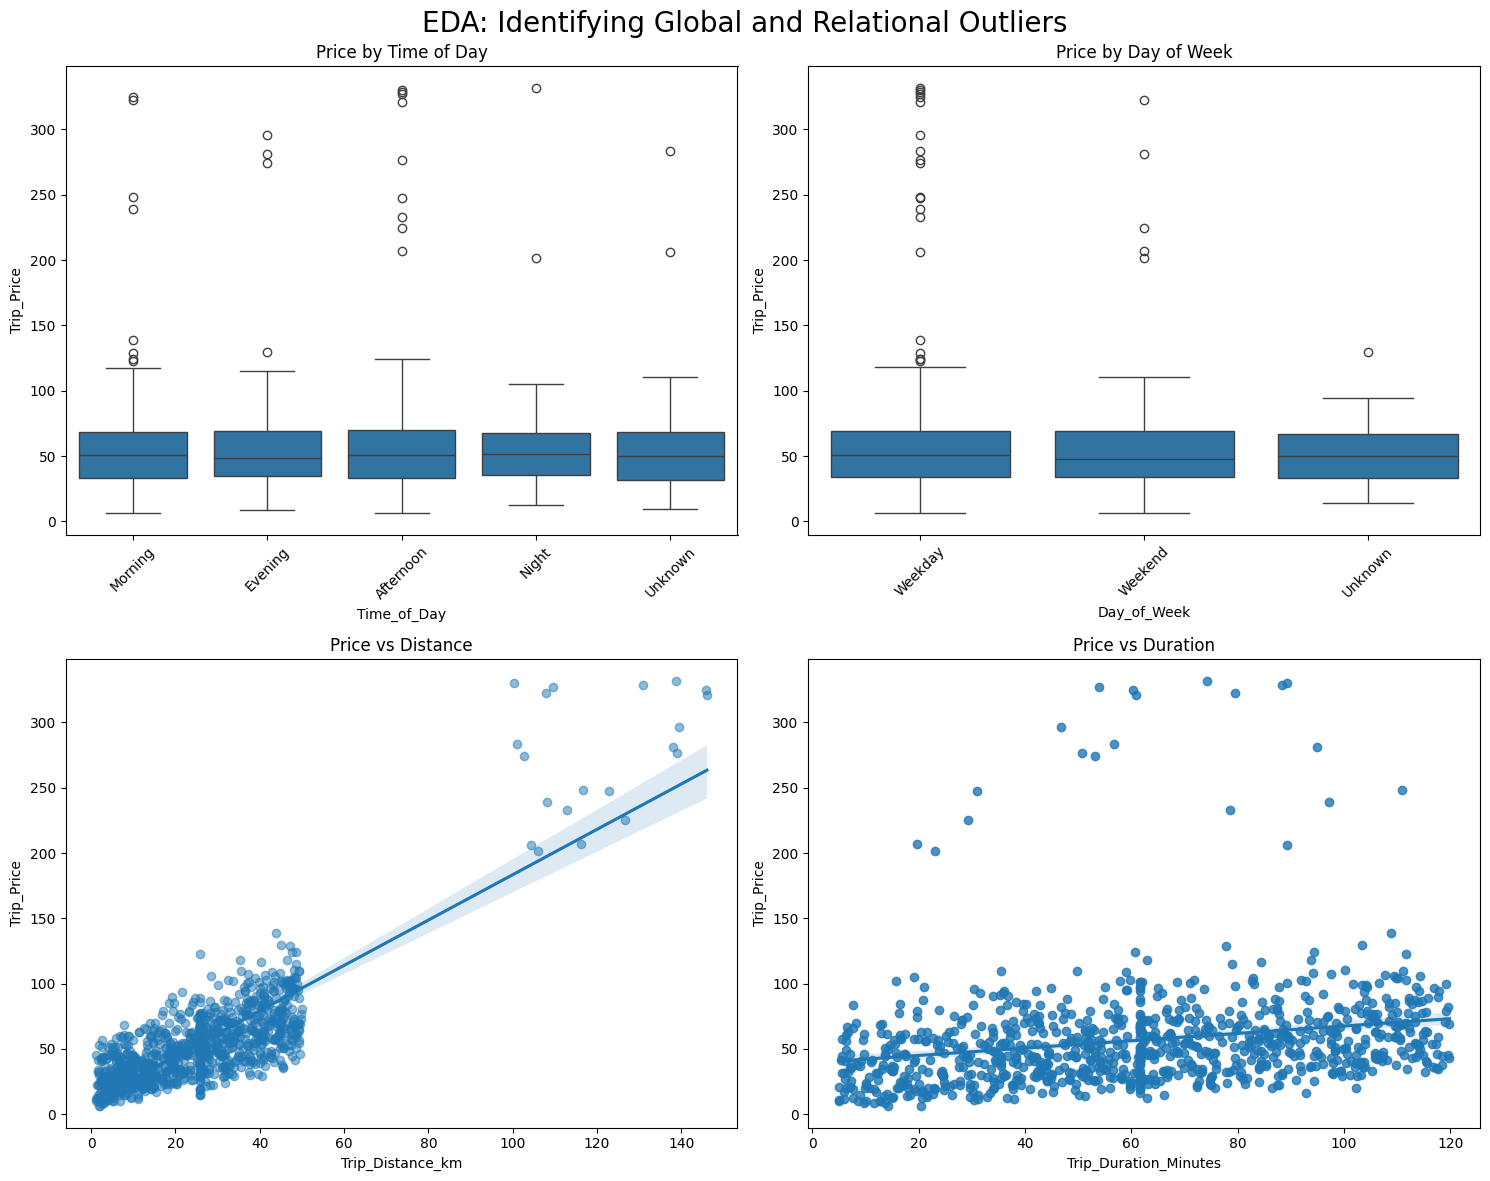

: 

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(ax=axes[0, 0], x='Time_of_Day', y='Trip_Price', data=df_known)
axes[0, 0].set_title('Price by Time of Day')
axes[0, 0].tick_params(axis='x', labelrotation=45)

sns.boxplot(ax=axes[0, 1], x='Day_of_Week', y='Trip_Price', data=df_known)
axes[0, 1].set_title('Price by Day of Week')
axes[0, 1].tick_params(axis='x', labelrotation=45)

sns.regplot(ax=axes[1, 0], x='Trip_Distance_km', y='Trip_Price', data=df_known, scatter_kws={'alpha':0.5})
axes[1, 0].set_title('Price vs Distance')

sns.regplot(ax=axes[1, 1], x='Trip_Duration_Minutes', y='Trip_Price', data=df_known)
axes[1, 1].set_title('Price vs Duration')

fig.suptitle('EDA: Identifying Global and Relational Outliers', fontsize=20)

plt.tight_layout()
plt.savefig('../data/screenshots/eda_outliers.png', dpi=300, bbox_inches='tight')
plt.show()


### Outlier Detection using Interquartile Range (IQR)
To ensure the model is not skewed by extreme pricing anomalies, we calculate the statistical **Upper Bound** using the IQR method.

In [ ]:
upper_bound = df_known['Trip_Price'].quantile(0.75) + 1.5 * (df_known['Trip_Price'].quantile(0.75) - df_known['Trip_Price'].quantile(0.25))

outliers = df_known[df_known['Trip_Price'] > upper_bound]
print(outliers)
print('Number of high-priced outliers:', len(outliers))


     Trip_Distance_km Time_of_Day Day_of_Week Traffic_Conditions  Weather  \
19         105.943550       Night     Weekend                Low     Rain   
24         138.098328     Evening     Weekend             Medium     Rain   
60         146.067047   Afternoon     Weekday             Medium    Clear   
103        112.830958   Afternoon     Weekday               High     Snow   
104        102.747556     Evening     Weekday             Medium    Clear   
134        109.616082   Afternoon     Weekday               High    Clear   
212        130.809001   Afternoon     Weekday               High    Clear   
249        116.196064   Afternoon     Weekend             Medium    Clear   
250        139.062230   Afternoon     Weekday                Low     Rain   
266        100.380420   Afternoon     Weekday             Medium     Rain   
281        145.747060     Morning     Weekday               High     Rain   
316        116.667681     Morning     Weekday               High    Clear   

: 

: 

### Filtering out extreme trips (outliers)

removing extreme cases to prevent the model from overfitting to "junk" data or rare long-distance trips.

In [ ]:
df_known_cleaned = df_known[
    (df_known['Trip_Distance_km'] <= 50) & 
    (df_known['Trip_Price'] <= 150)
].copy() 

df_known_cleaned = df_known_cleaned.reset_index(drop=True)


: 

: 

### Visualizing Anomalies & Data Distribution

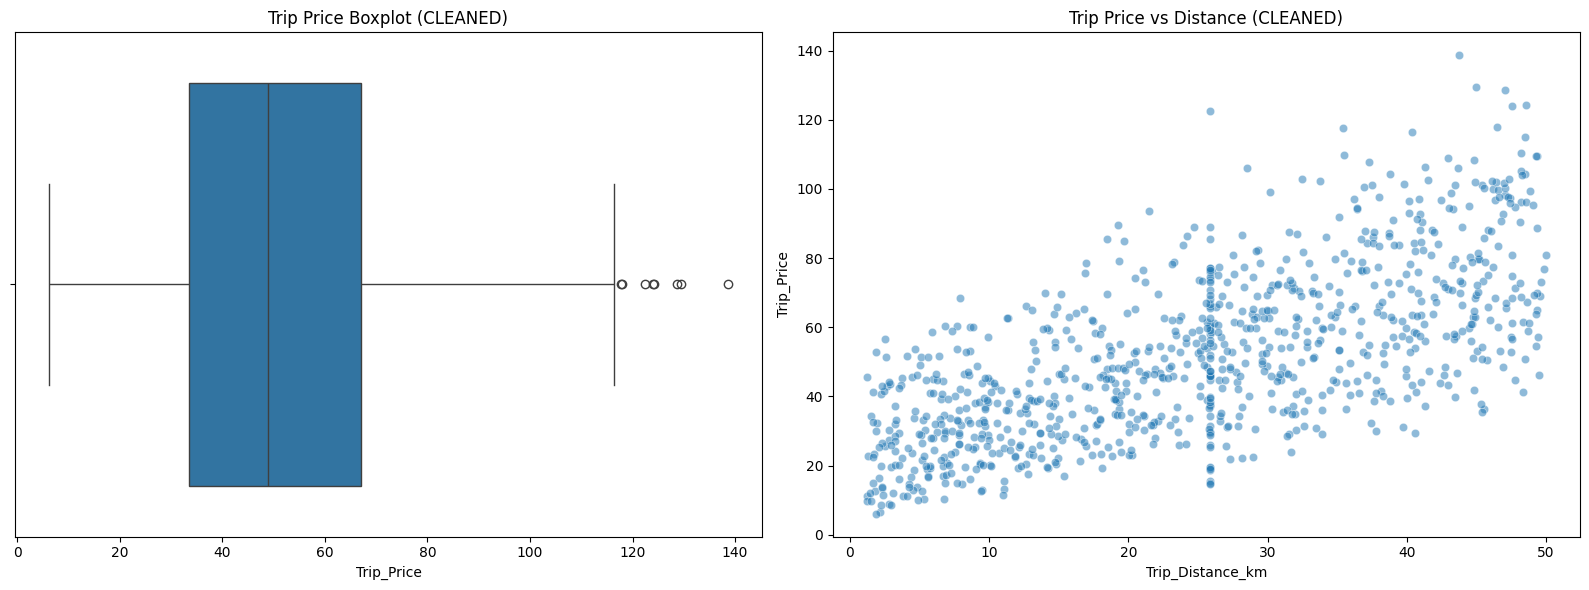

: 

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(ax=axes[0], x=df_known_cleaned['Trip_Price'])
axes[0].set_title('Trip Price Boxplot (CLEANED)')

sns.scatterplot(ax=axes[1], x='Trip_Distance_km', y='Trip_Price', 
                data=df_known_cleaned, alpha=0.5)
axes[1].set_title('Trip Price vs Distance (CLEANED)')

plt.tight_layout()
plt.savefig('../data/screenshots/eda_cleaned_price_distance.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df_known_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       931 non-null    float64
 1   Time_of_Day            931 non-null    object 
 2   Day_of_Week            931 non-null    object 
 3   Traffic_Conditions     931 non-null    object 
 4   Weather                931 non-null    object 
 5   Trip_Duration_Minutes  931 non-null    float64
 6   Trip_Price             931 non-null    float64
dtypes: float64(3), object(4)
memory usage: 51.0+ KB


: 

: 

### Log-Transforming the Target Variable
Before training our model, we create a log-transformed version of the trip price. This process changes the scale of our target variable to make it more suitable for certain mathematical algorithms.

In [ ]:
import numpy as np

df_known_cleaned.loc[:, 'Trip_Price_log'] = np.log1p(df_known_cleaned['Trip_Price'])
df_known_cleaned.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price,Trip_Price_log
0,19.35,Morning,Weekday,Low,Clear,53.82,36.2624,3.617985
1,36.87,Evening,Weekend,High,Clear,37.27,52.9032,3.987190
2,30.33,Evening,Weekday,Low,Unknown,116.81,36.4698,3.623535
3,25.87,Evening,Weekday,High,Clear,22.64,15.6180,2.810486
4,8.64,Afternoon,Weekend,Medium,Clear,89.33,60.2028,4.114193


: 

: 

### Encode categorical features
Since machine learning models cannot process text labels directly, we use One-Hot Encoding to convert categorical variables into numerical "dummy" variables.

In [ ]:
df_known_encoded = pd.get_dummies(
    df_known_cleaned, 
    columns=['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], 
    drop_first=True,
    dtype=float 
)

df_unknown_encoded = pd.get_dummies(
    df_unknown, 
    columns=['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], 
    drop_first=True,
    dtype=float
)

: 

: 

In [ ]:
df_known_encoded.head()

,Trip_Distance_km,Trip_Duration_Minutes,Trip_Price,Trip_Price_log,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Time_of_Day_Unknown,Day_of_Week_Weekday,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Traffic_Conditions_Unknown,Weather_Rain,Weather_Snow,Weather_Unknown
0,19.35,53.82,36.2624,3.617985,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,36.87,37.27,52.9032,3.987190,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30.33,116.81,36.4698,3.623535,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,25.87,22.64,15.6180,2.810486,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.64,89.33,60.2028,4.114193,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


: 

: 

### Analyzing Feature Correlations
Now that the data is numerical, we use a Correlation Heatmap to visualize the relationships between our features and the target variable (Trip_Price).

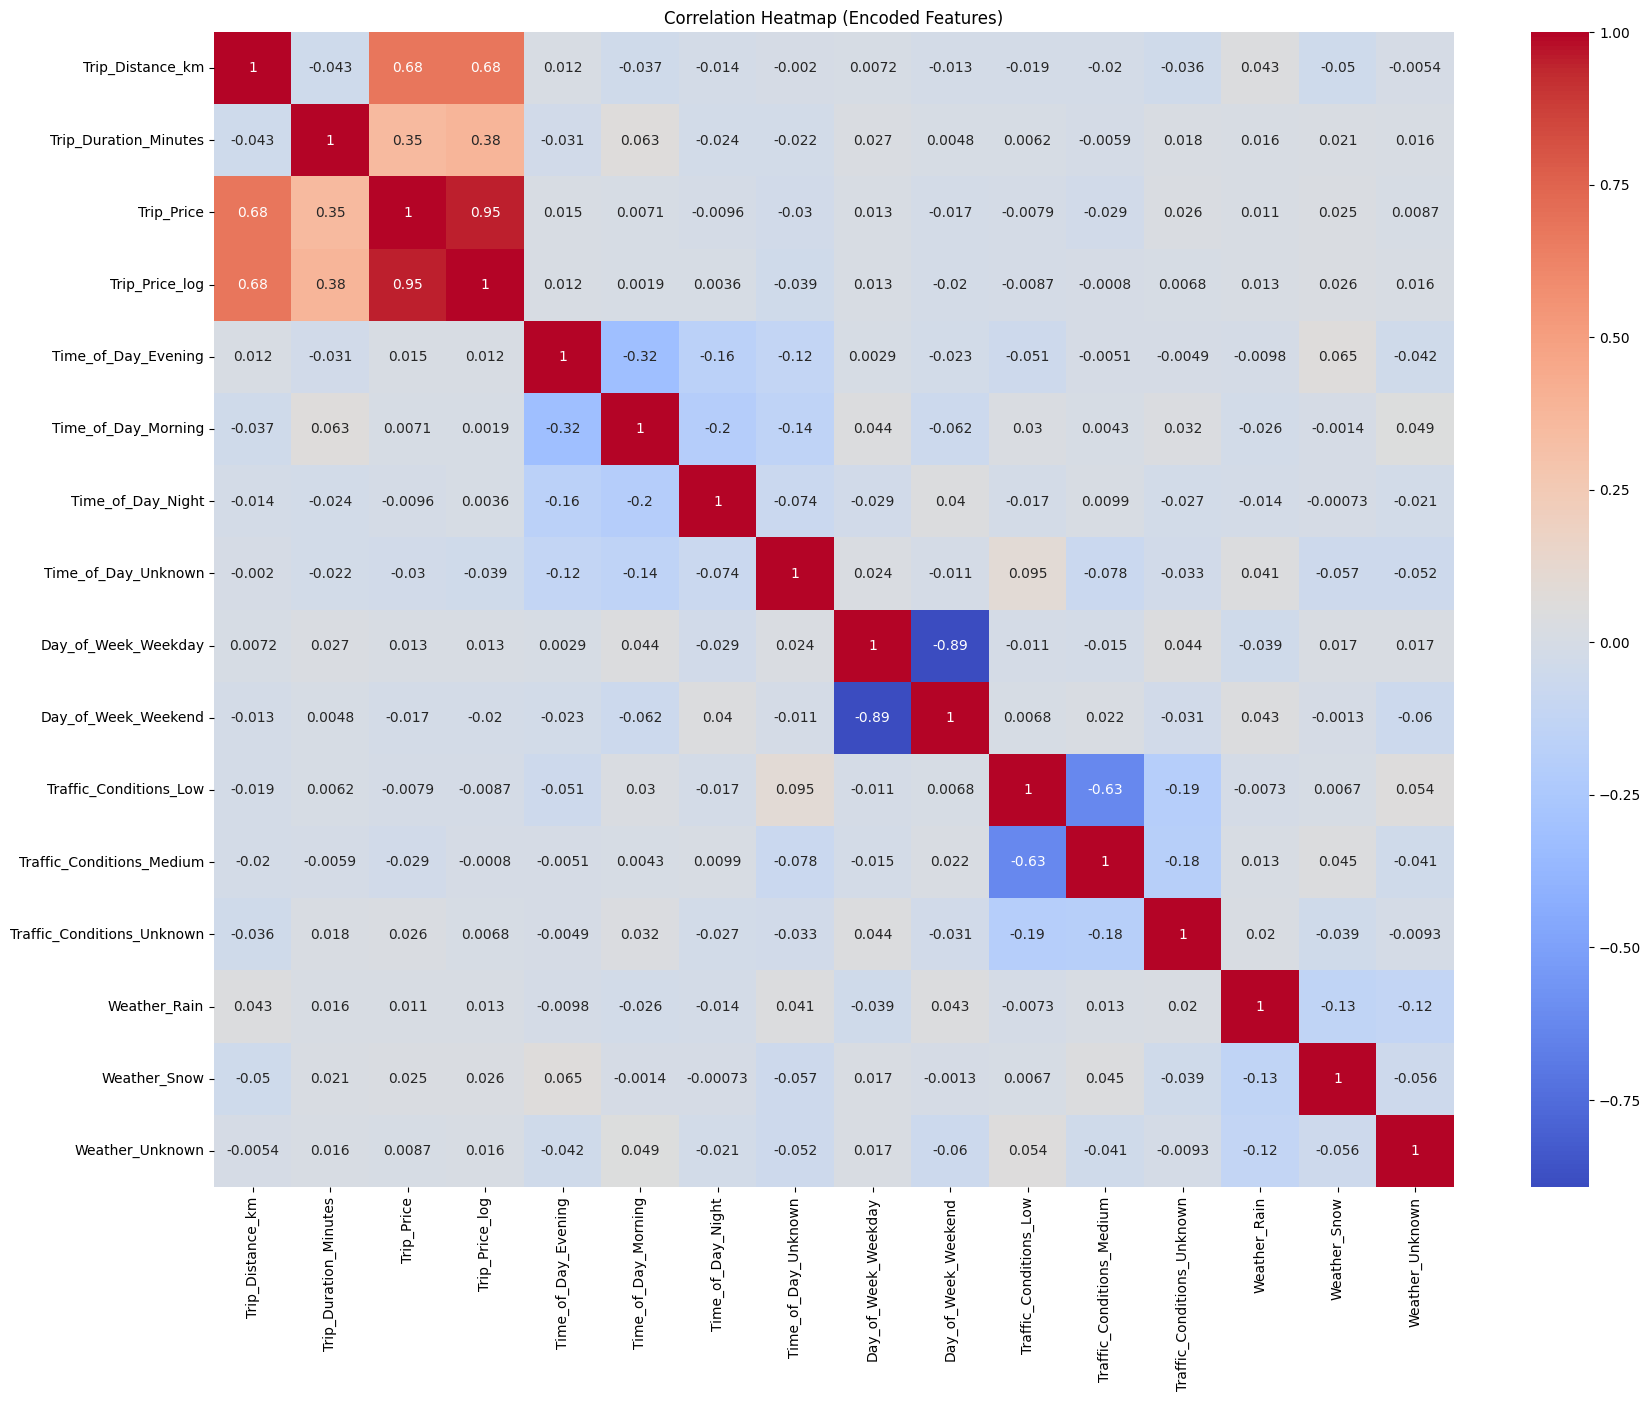

: 

: 

In [ ]:
plt.figure(figsize=(20,15))  # wider and taller
sns.heatmap(df_known_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Encoded Features)')
plt.savefig('../data/screenshots/correlation_heatmap_encoded.png', dpi=300, bbox_inches='tight')
plt.show()

### Feature Alignment
Machine learning models require the prediction data to have the exact same columns, in the exact same order, as the training data. This step ensures that any category present in the training set (e.g., a specific weather type) is also represented in the unknown set, even if it has to be filled with zeros.

In [ ]:
missing_cols = set(df_known_encoded.columns) - set(df_unknown_encoded.columns)

for col in missing_cols:
    if col not in ['Trip_Price', 'Trip_Price_log']:
        df_unknown_encoded[col] = 0.0

features = [c for c in df_known_encoded.columns if c not in ['Trip_Price', 'Trip_Price_log']]
df_unknown_final = df_unknown_encoded[features]

print(f'Alignment complete. Both datasets now use these {len(features)} features.')

Alignment complete. Both datasets now use these 14 features.


: 

: 

### Final Statistical Validation

In [ ]:
df_known_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
Trip_Distance_km,931.0,25.112213,13.992102,1.230000,12.880000,25.870000,37.115000,49.990000
Trip_Duration_Minutes,931.0,61.970548,31.638365,5.010000,36.595000,61.570000,87.850000,119.840000
Trip_Price,931.0,52.181554,24.091073,6.126900,33.390700,48.835000,67.069500,138.642500
Trip_Price_log,931.0,3.858750,0.505866,1.963876,3.537786,3.908718,4.220526,4.939086
Time_of_Day_Evening,931.0,0.208378,0.406367,0.000000,0.000000,0.000000,0.000000,1.000000
Time_of_Day_Morning,931.0,0.280344,0.449409,0.000000,0.000000,0.000000,1.000000,1.000000
Time_of_Day_Night,931.0,0.093448,0.291216,0.000000,0.000000,0.000000,0.000000,1.000000
Time_of_Day_Unknown,931.0,0.050483,0.219058,0.000000,0.000000,0.000000,0.000000,1.000000
Day_of_Week_Weekday,931.0,0.651987,0.476596,0.000000,0.000000,1.000000,1.000000,1.000000
Day_of_Week_Weekend,931.0,0.298604,0.457892,0.000000,0.000000,0.000000,1.000000,1.000000


: 

: 

### Export data

In [ ]:
df_known_encoded.to_csv('../data/df_train.csv', index=False)
df_unknown_final.to_csv('../data/df_predict.csv', index=False)

: 

: 